## Viz of the week - Bundesliga Round 2 Summary

### Imports

In [76]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.patches as patches
from matplotlib import rcParams
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm

import pandas as pd

from PIL import Image
import urllib
import os

In [75]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.2


### Read fonts (optional)

In [51]:
font_path = r"" #Set the path to where the fonts are located

for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y)
            except Exception as e:
                print(f"Font {y} could not be added.")
                continue

rcParams['font.family'] = 'Karla'

Font DMSans-BoldItalic.ttf could not be added.
Font DMSans-Italic.ttf could not be added.
Font DMSans-MediumItalic.ttf could not be added.
Font Karla-BoldItalic.ttf could not be added.
Font Karla-ExtraBold.ttf could not be added.
Font Karla-ExtraBoldItalic.ttf could not be added.
Font Karla-ExtraLight.ttf could not be added.
Font Karla-ExtraLightItalic.ttf could not be added.
Font Karla-Italic.ttf could not be added.
Font Karla-LightItalic.ttf could not be added.
Font Karla-MediumItalic.ttf could not be added.
Font Karla-SemiBoldItalic.ttf could not be added.


### Read the data

In [54]:
df = pd.read_csv('data/08152022_bundesliga_round2.csv', index_col=0)

### The Layout of the table

Our table will have the following columns:

| home_logo | fixture | away_logo | xG (H / A) | xGOT (H / A) | Shots (H / A) | Shots Accuracy (H / A) | 

Which results in 14 columns for our table (the fixture column will be four units long).

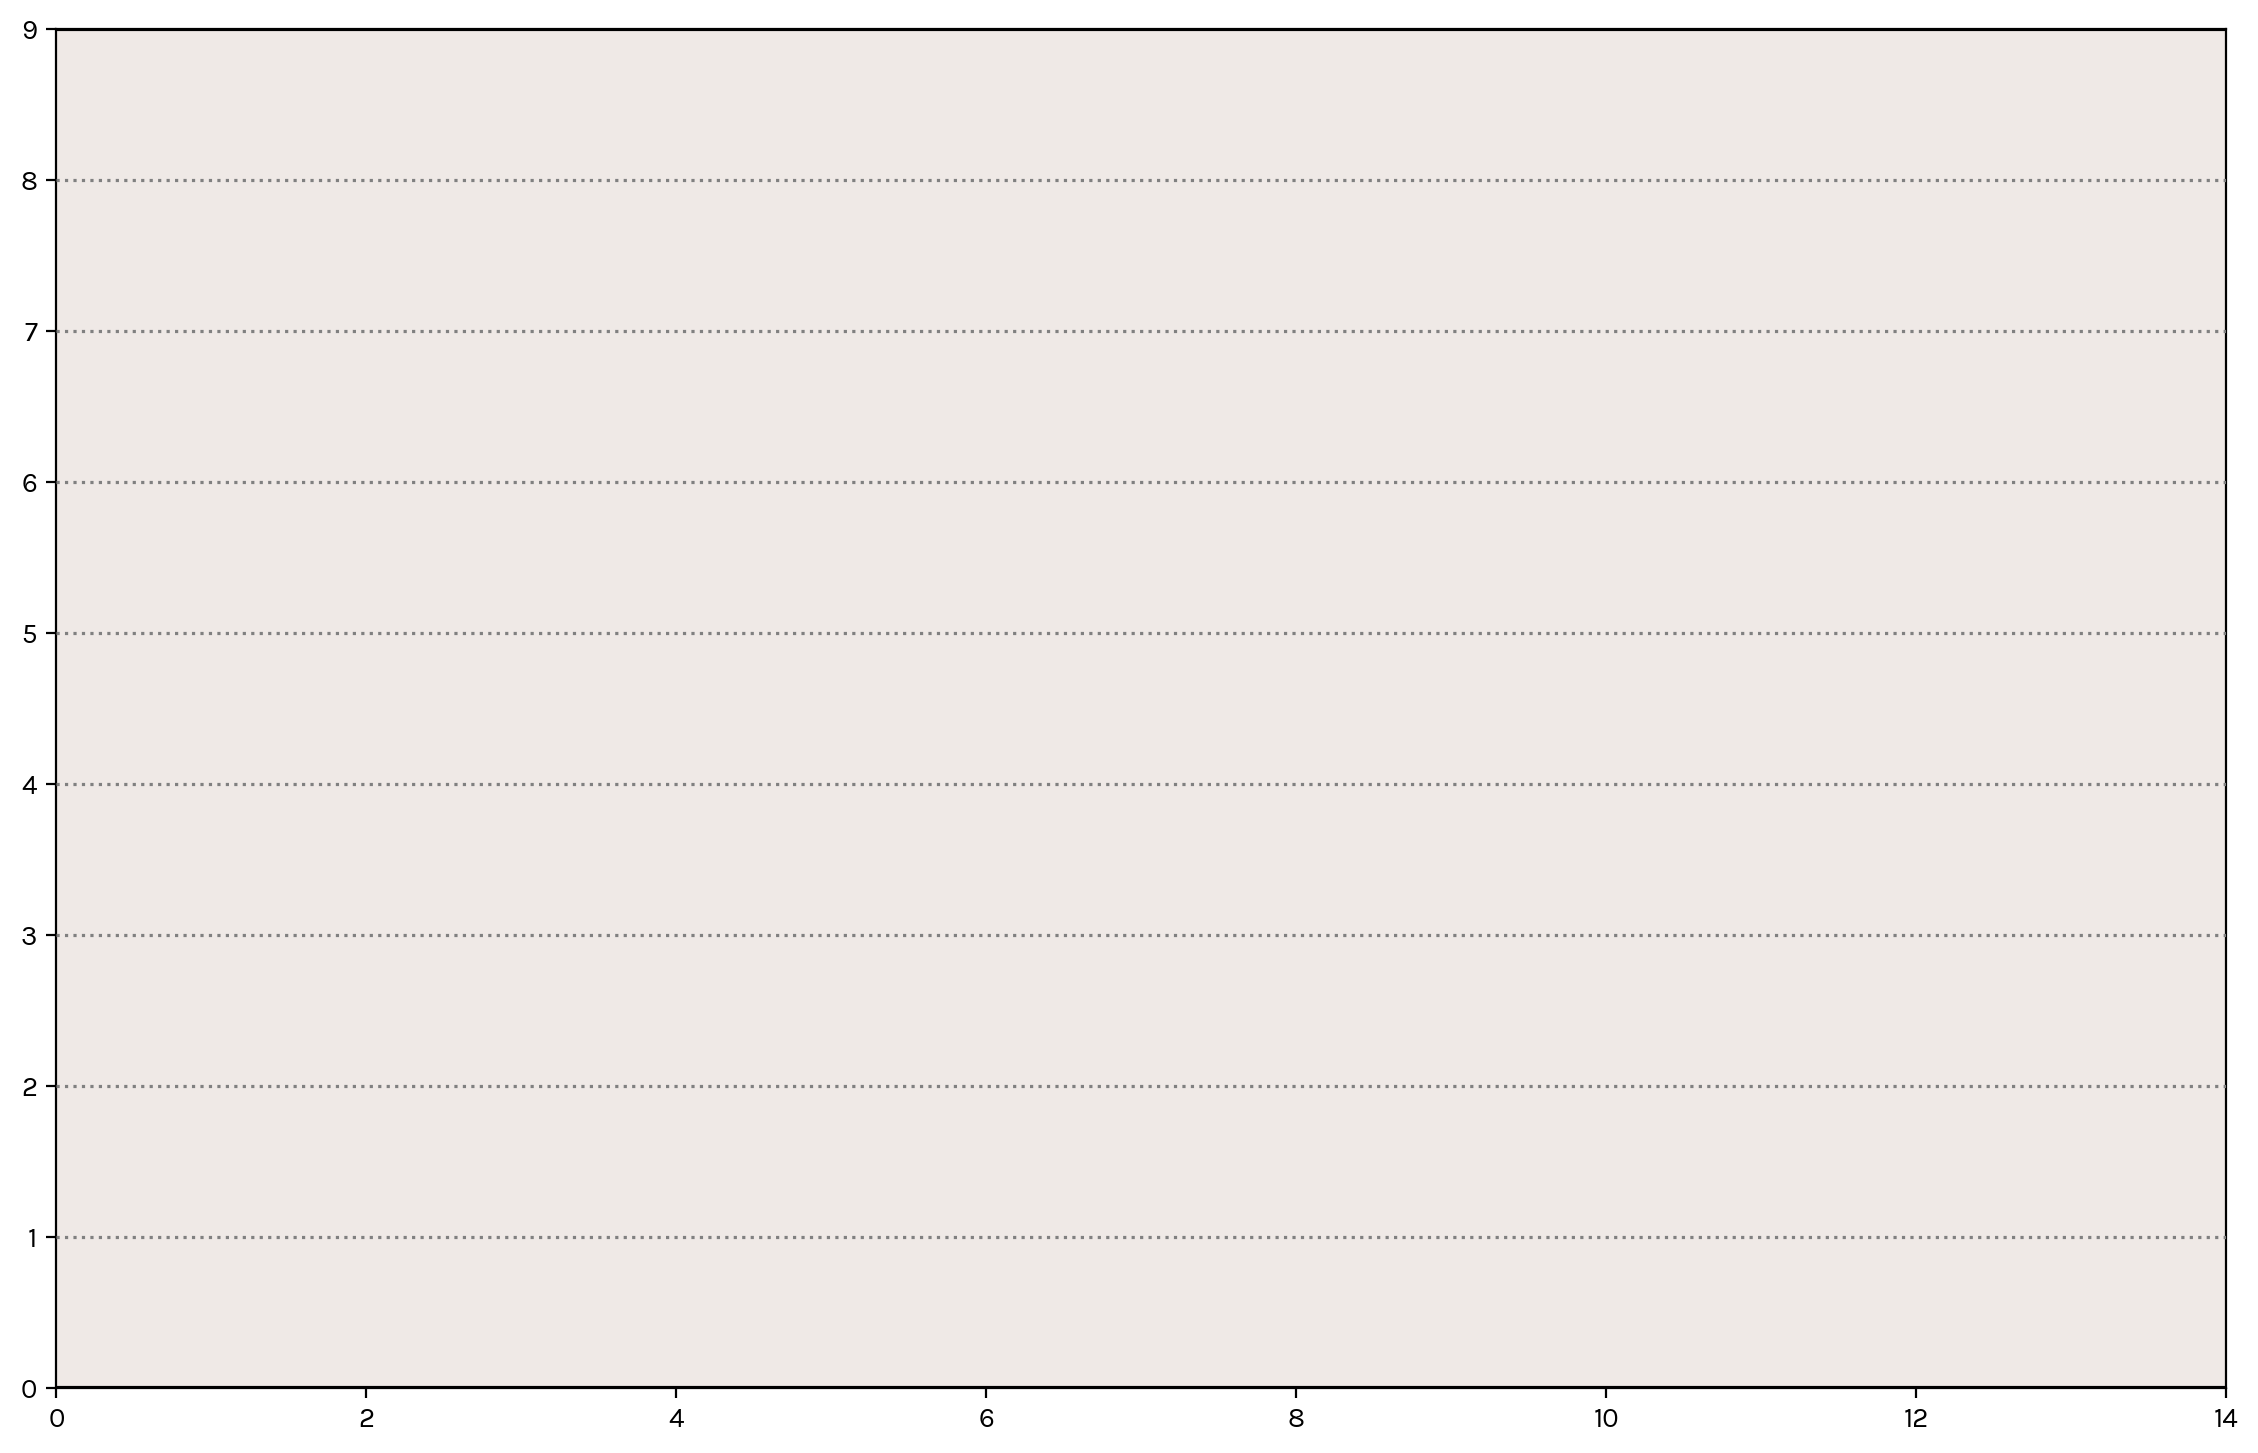

In [59]:
fig = plt.figure(figsize=(14, 9), dpi = 200)
ax = plt.subplot(111, facecolor = "#EFE9E6")

ncols = 14 
nrows = df.shape[0]

df = df.sort_values(by='date', ascending=False).reset_index(drop=True)

ax.set_xlim(0, ncols)
ax.set_ylim(0, nrows)

# Table borders
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw = 1.5, color = "black", marker = "", zorder = 4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw = 1.5, color = "black", marker = "", zorder = 4)
for x in range(nrows):
    if x == 0:
        continue
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw = 1.15, color = "gray", ls = ":", zorder = 3 , marker = "")


### Adding the fixture and logos

Although there are better ways to do this, I want to show step by step how we add each column to the table.

Notice that evertyhing is positioned on our grid of $\mathrm{nrows} \times \mathrm{ncols}$.

The `DC_to_NFC` function simply converts data coordinates to figure coordinates, so we add the axis exactly where we want it.

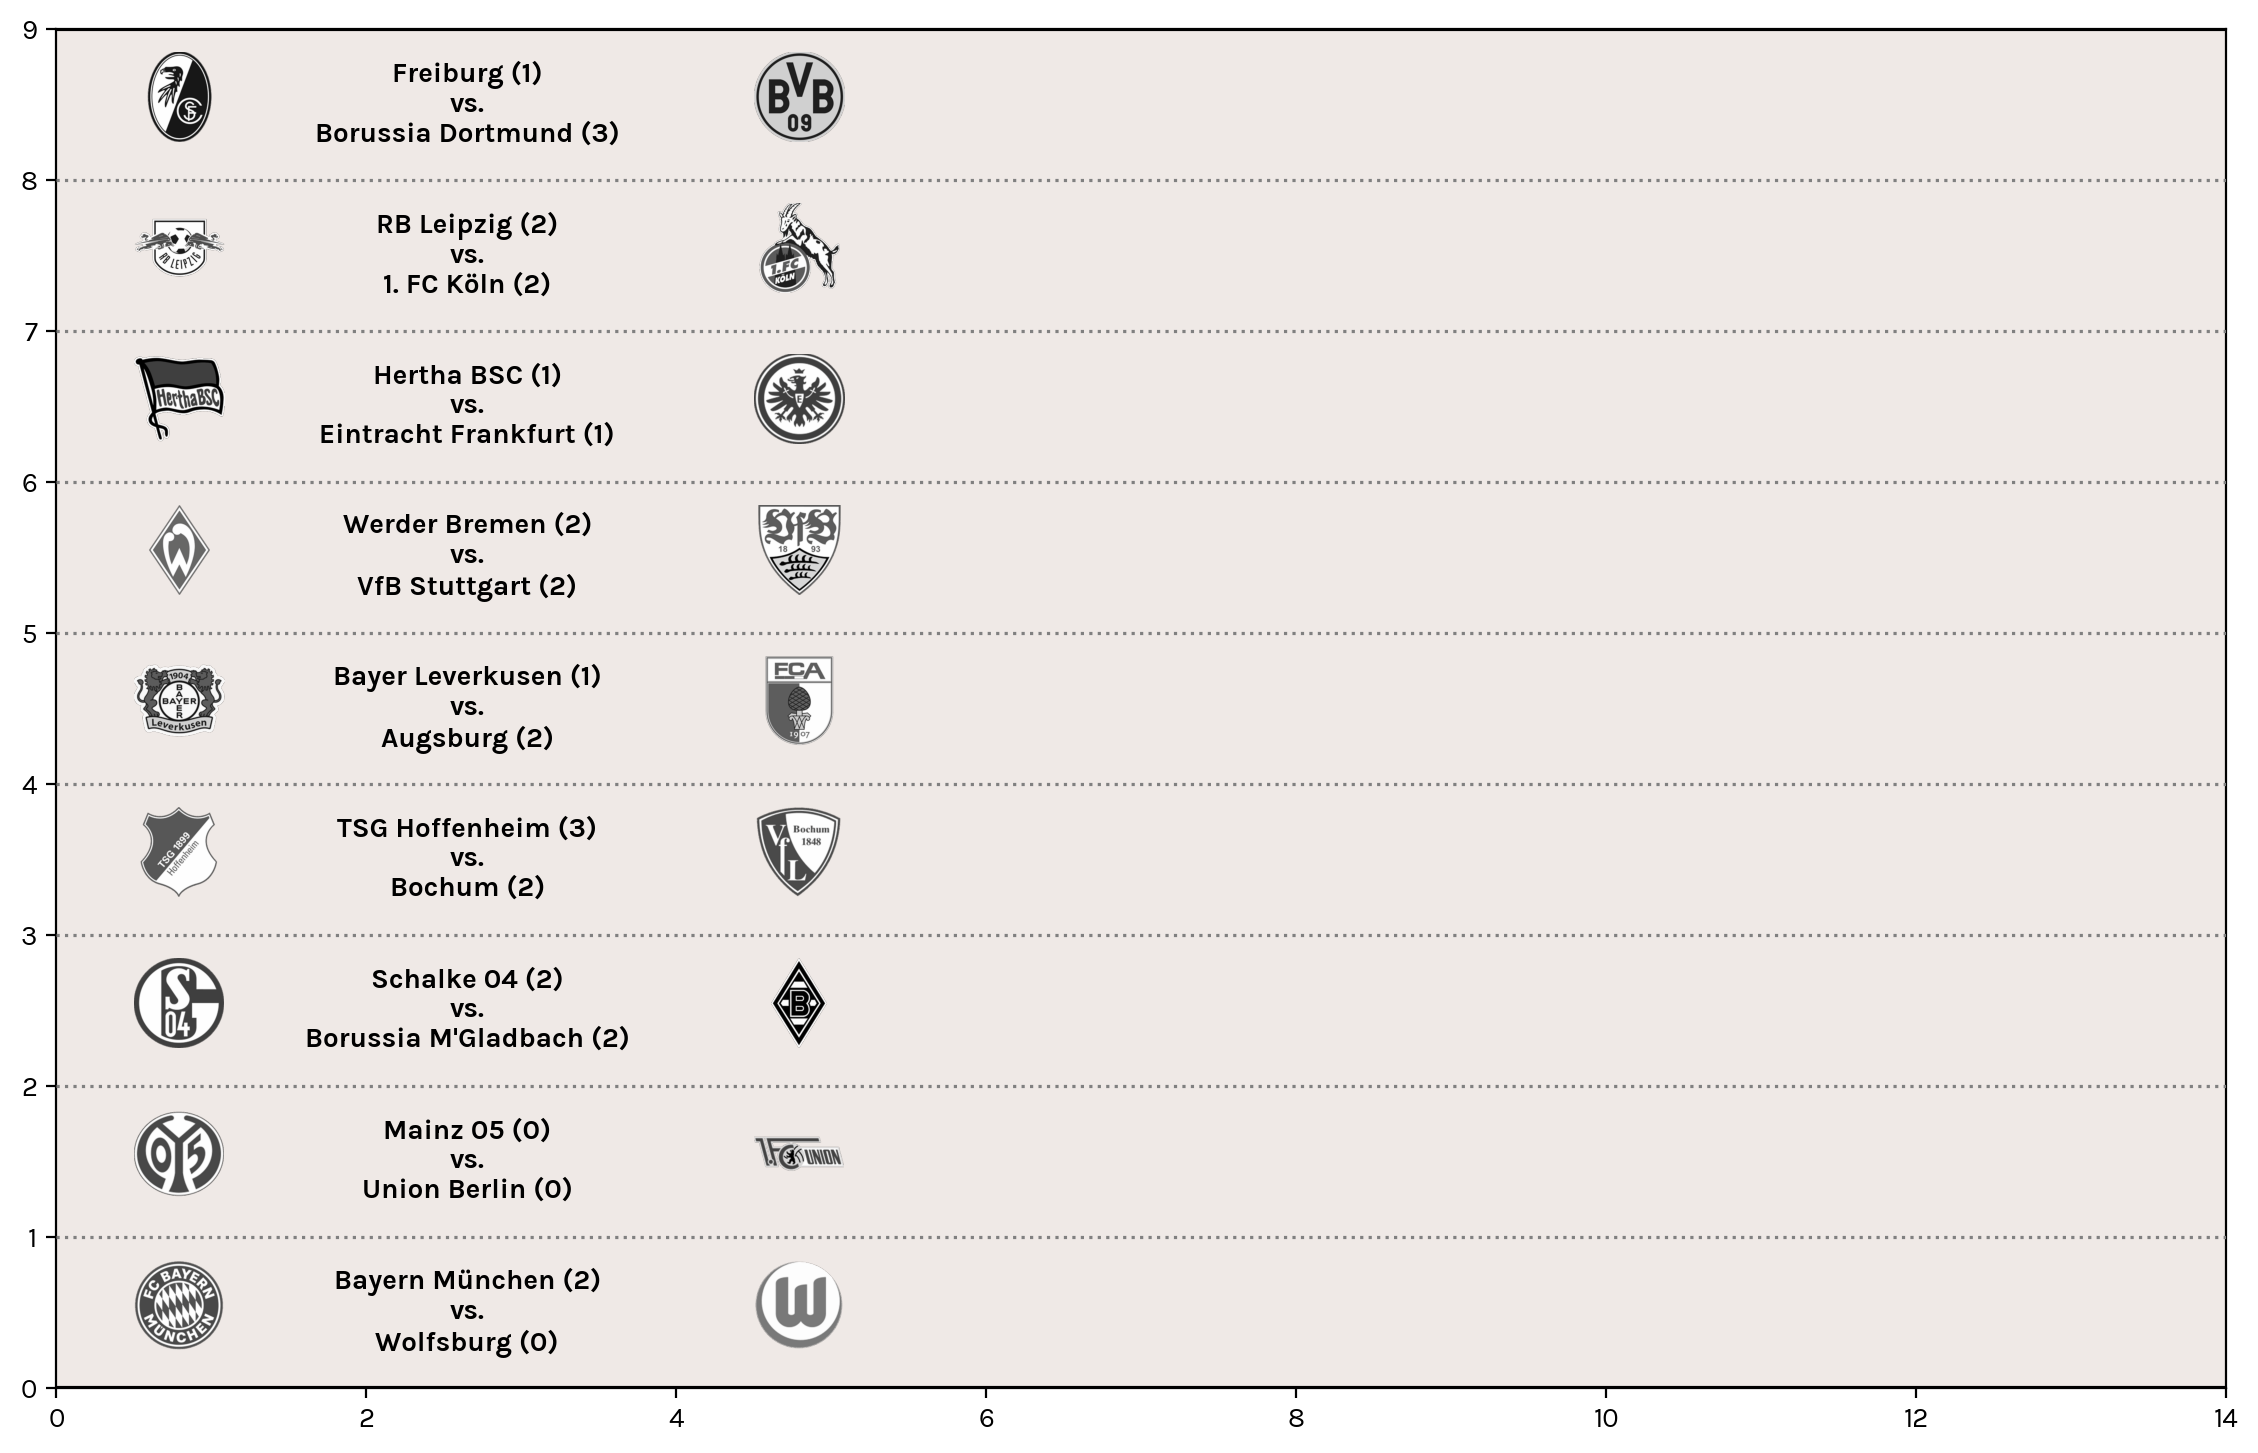

In [73]:

fig = plt.figure(figsize=(14, 9), dpi = 200)
ax = plt.subplot(111, facecolor = "#EFE9E6")

ncols = 14 
nrows = df.shape[0]

df = df.sort_values(by='date', ascending=False).reset_index(drop=True)

ax.set_xlim(0, ncols)
ax.set_ylim(0, nrows)

# --- Define URL and helper functions to add logos --------------------------------

fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# Native data to normalized data coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

# -- Add team logos

for y in range(nrows):
    # - Home logo
    x = 0
    team_id = df['home_team_id'].iloc[y]
    ax_coords = DC_to_NFC([x + .5, y + .25])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.05, 0.05], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    # - Away logo
    x = 5 
    team_id = df['away_team_id'].iloc[y]
    ax_coords = DC_to_NFC([x - .5, y + .25])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.05, 0.05], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    # - Fixture result
    x = 2.65
    home_name = df['home_team_name'].iloc[y]
    away_name = df['away_team_name'].iloc[y]
    home_score = df['home_team_score'].iloc[y]
    away_score = df['away_team_score'].iloc[y]

    label_ = f'{home_name} ({home_score:.0f})\nvs.\n{away_name} ({away_score:.0f})'
    ax.annotate(
        xy=(x,y + 0.5),
        text=label_,
        ha='center',
        va='center',
        weight='bold'
    )

# Table borders
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw = 1.5, color = 'black', marker = '', zorder = 4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw = 1.5, color = 'black', marker = '', zorder = 4)
for x in range(nrows):
    if x == 0:
        continue
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw = 1.15, color = 'gray', ls = ':', zorder = 3 , marker = '')



### Adding the numerical variables

As you'll see in the code, it's not perfect...some adjustments need to be made on the go to achieve perfect positioning.

Still working on a way to automate this.

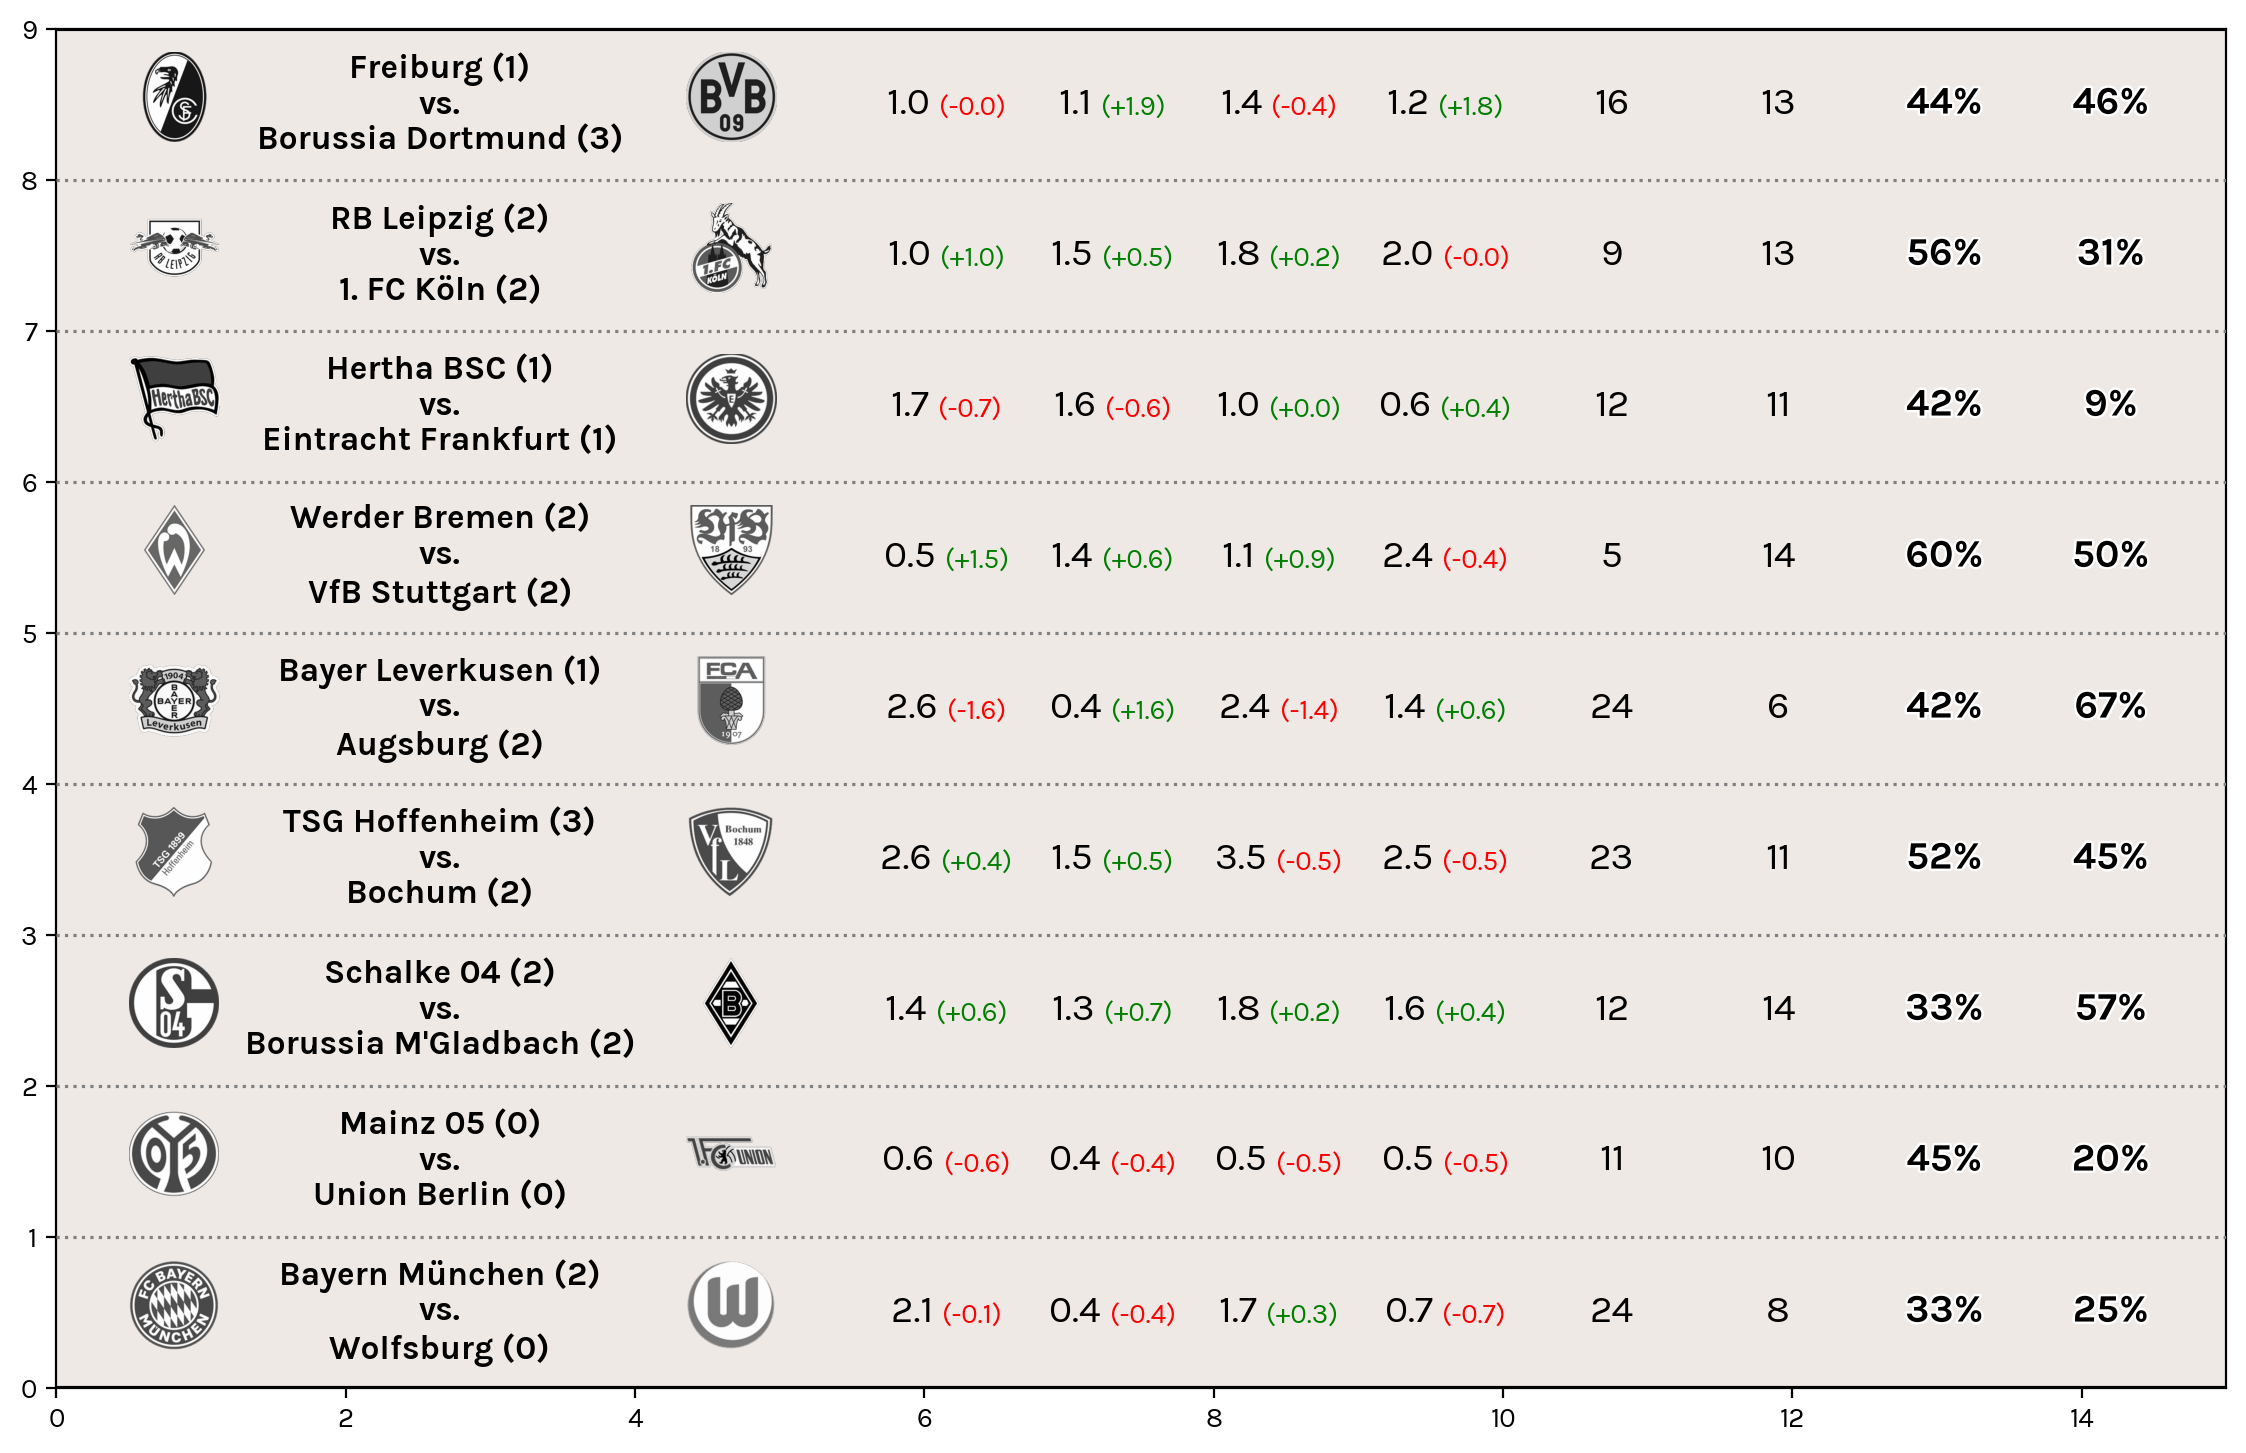

In [95]:

fig = plt.figure(figsize=(14, 9), dpi = 200)
ax = plt.subplot(111, facecolor = "#EFE9E6")

ncols = 14 
nrows = df.shape[0]

df = df.sort_values(by='date', ascending=False).reset_index(drop=True)

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows)

# --- Define URL and helper functions to add logos --------------------------------

fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# Native data to normalized data coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

for y in range(nrows):
    # -----------------------------------------
    # - Home logo
    x = 0
    team_id = df['home_team_id'].iloc[y]
    ax_coords = DC_to_NFC([x + .5, y + .25])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.05, 0.05], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    # -----------------------------------------
    # - Fixture result
    x = 2.65
    home_name = df['home_team_name'].iloc[y]
    away_name = df['away_team_name'].iloc[y]
    home_score = df['home_team_score'].iloc[y]
    away_score = df['away_team_score'].iloc[y]
    label_ = f'{home_name} ({home_score:.0f})\nvs.\n{away_name} ({away_score:.0f})'
    ax.annotate(
        xy=(x,y + 0.5),
        text=label_,
        ha='center',
        va='center',
        size=12,
        weight='bold'
    )
    # -----------------------------------------
    # - Away logo
    x = 5 
    team_id = df['away_team_id'].iloc[y]
    ax_coords = DC_to_NFC([x - .65, y + .25])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.05, 0.05], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    # -----------------------------------------
    # -- xGs
    home_xG = df['home_team_xG'].iloc[y]
    away_xG = df['away_team_xG'].iloc[y]
    xG_diff_h = home_score - home_xG
    xG_diff_a = away_score - away_xG
    # -- Home xG
    x = 6.15
    if xG_diff_h < 0:
        high_color='red'
        label_h_ = f'{home_xG:.1f} <({(xG_diff_h):.1f})>'
    else:
        high_color='green'
        label_h_ = f'{home_xG:.1f} <(+{(xG_diff_h):.1f})>'
    ax_text(
        x=x,y=y+0.5,
        s=label_h_,
        ha='center',
        va='center',
        highlight_textprops=[{'size':10,'color':high_color}],
        size=14,
        ax=ax
    )
    # -- Away xG
    x = 7.3
    if xG_diff_a < 0:
        high_color='red'
        label_a_ = f'{away_xG:.1f} <({(xG_diff_a):.1f})>'
    else:
        high_color='green'
        label_a_ = f'{away_xG:.1f} <(+{(xG_diff_a):.1f})>'
    ax_text(
        x=x,y=y+0.5,
        s=label_a_,
        ha='center',
        va='center',
        highlight_textprops=[{'size':10,'color':high_color}],
        size=14,
        ax=ax
    )
    # -----------------------------------------
    # -- xGOT
    home_xGOT = df['home_team_xGOT'].iloc[y]
    away_xGOT = df['away_team_xGOT'].iloc[y]
    xGOT_diff_h = home_score - home_xGOT
    xGOT_diff_a = away_score - away_xGOT
    # -- Home xGOT
    x = 8.45
    if xGOT_diff_h < 0:
        high_color='red'
        label_h_ = f'{home_xGOT:.1f} <({(xGOT_diff_h):.1f})>'
    else:
        high_color='green'
        label_h_ = f'{home_xGOT:.1f} <(+{(xGOT_diff_h):.1f})>'
    ax_text(
        x=x,y=y+0.5,
        s=label_h_,
        ha='center',
        va='center',
        highlight_textprops=[{'size':10,'color':high_color}],
        size=14,
        ax=ax
    )
    # -- Away xGOT
    x = 9.6
    if xGOT_diff_a < 0:
        high_color='red'
        label_a_ = f'{away_xGOT:.1f} <({(xGOT_diff_a):.1f})>'
    else:
        high_color='green'
        label_a_ = f'{away_xGOT:.1f} <(+{(xGOT_diff_a):.1f})>'
    ax_text(
        x=x,y=y+0.5,
        s=label_a_,
        ha='center',
        va='center',
        highlight_textprops=[{'size':10,'color':high_color}],
        size=14,
        ax=ax
    )
    # -----------------------------------------
    # -- Shots
    home_shots = df['home_team_shots'].iloc[y]
    away_shots = df['away_team_shots'].iloc[y]
    label_h_ = f'{home_shots:.0f}'
    label_a_ = f'{away_shots:.0f}'
    # -- Home shots
    x = 10.75
    ax_text(
        x=x,y=y+0.5,
        s=label_h_,
        ha='center',
        va='center',
        size=14,
        ax=ax
    )
    # -- Away shots
    x = 11.9
    ax_text(
        x=x,y=y+0.5,
        s=label_a_,
        ha='center',
        va='center',
        size=14,
        ax=ax
    )
    # -- Accuracy
    home_shotsOT = df['home_team_shotsOT'].iloc[y]
    away_shotsOT = df['away_team_shotsOT'].iloc[y]
    label_h_ = f'{home_shotsOT/home_shots:.0%}'
    label_a_ = f'{away_shotsOT/away_shots:.0%}'
    # -- Home shots
    x = 13.05
    text_ = ax.annotate(
        xy=(x,y+0.5),
        text=label_h_,
        ha='center',
        va='center',
        size=14,
        weight='bold'
    )
    text_.set_path_effects(
        [path_effects.Stroke(linewidth=1.75, foreground="white"), path_effects.Normal()]
    )
    # -- Away shots
    x = 14.2
    text_ = ax.annotate(
        xy=(x,y+0.5),
        text=label_a_,
        ha='center',
        va='center',
        size=14,
        weight='bold'
    )
    text_.set_path_effects(
        [path_effects.Stroke(linewidth=1.75, foreground="white"), path_effects.Normal()]
    )


# Table borders
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw = 1.5, color = 'black', marker = '', zorder = 4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw = 1.5, color = 'black', marker = '', zorder = 4)
for x in range(nrows):
    if x == 0:
        continue
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw = 1.15, color = 'gray', ls = ':', zorder = 3 , marker = '')



### Adding colors

We define a new color map to add the gradient to the accuracy column.

In [96]:
colors = [
    '#efe9e6',
    '#e9e1dd',
    '#e3dad3',
    '#dcd3c9',
    '#d4ccc0',
    '#ccc6b7',
    '#c3bfae',
    '#bab9a6',
    '#b0b39e',
    '#a6ad96',
    '#9ba790',
    '#90a18a',
    '#849b84',
    '#789680',
    '#6c907c',
    '#608a79',
    '#538476',
    '#467e74',
    '#387872',
    '#287271',
]
soc_cm = LinearSegmentedColormap.from_list('SOC', colors, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

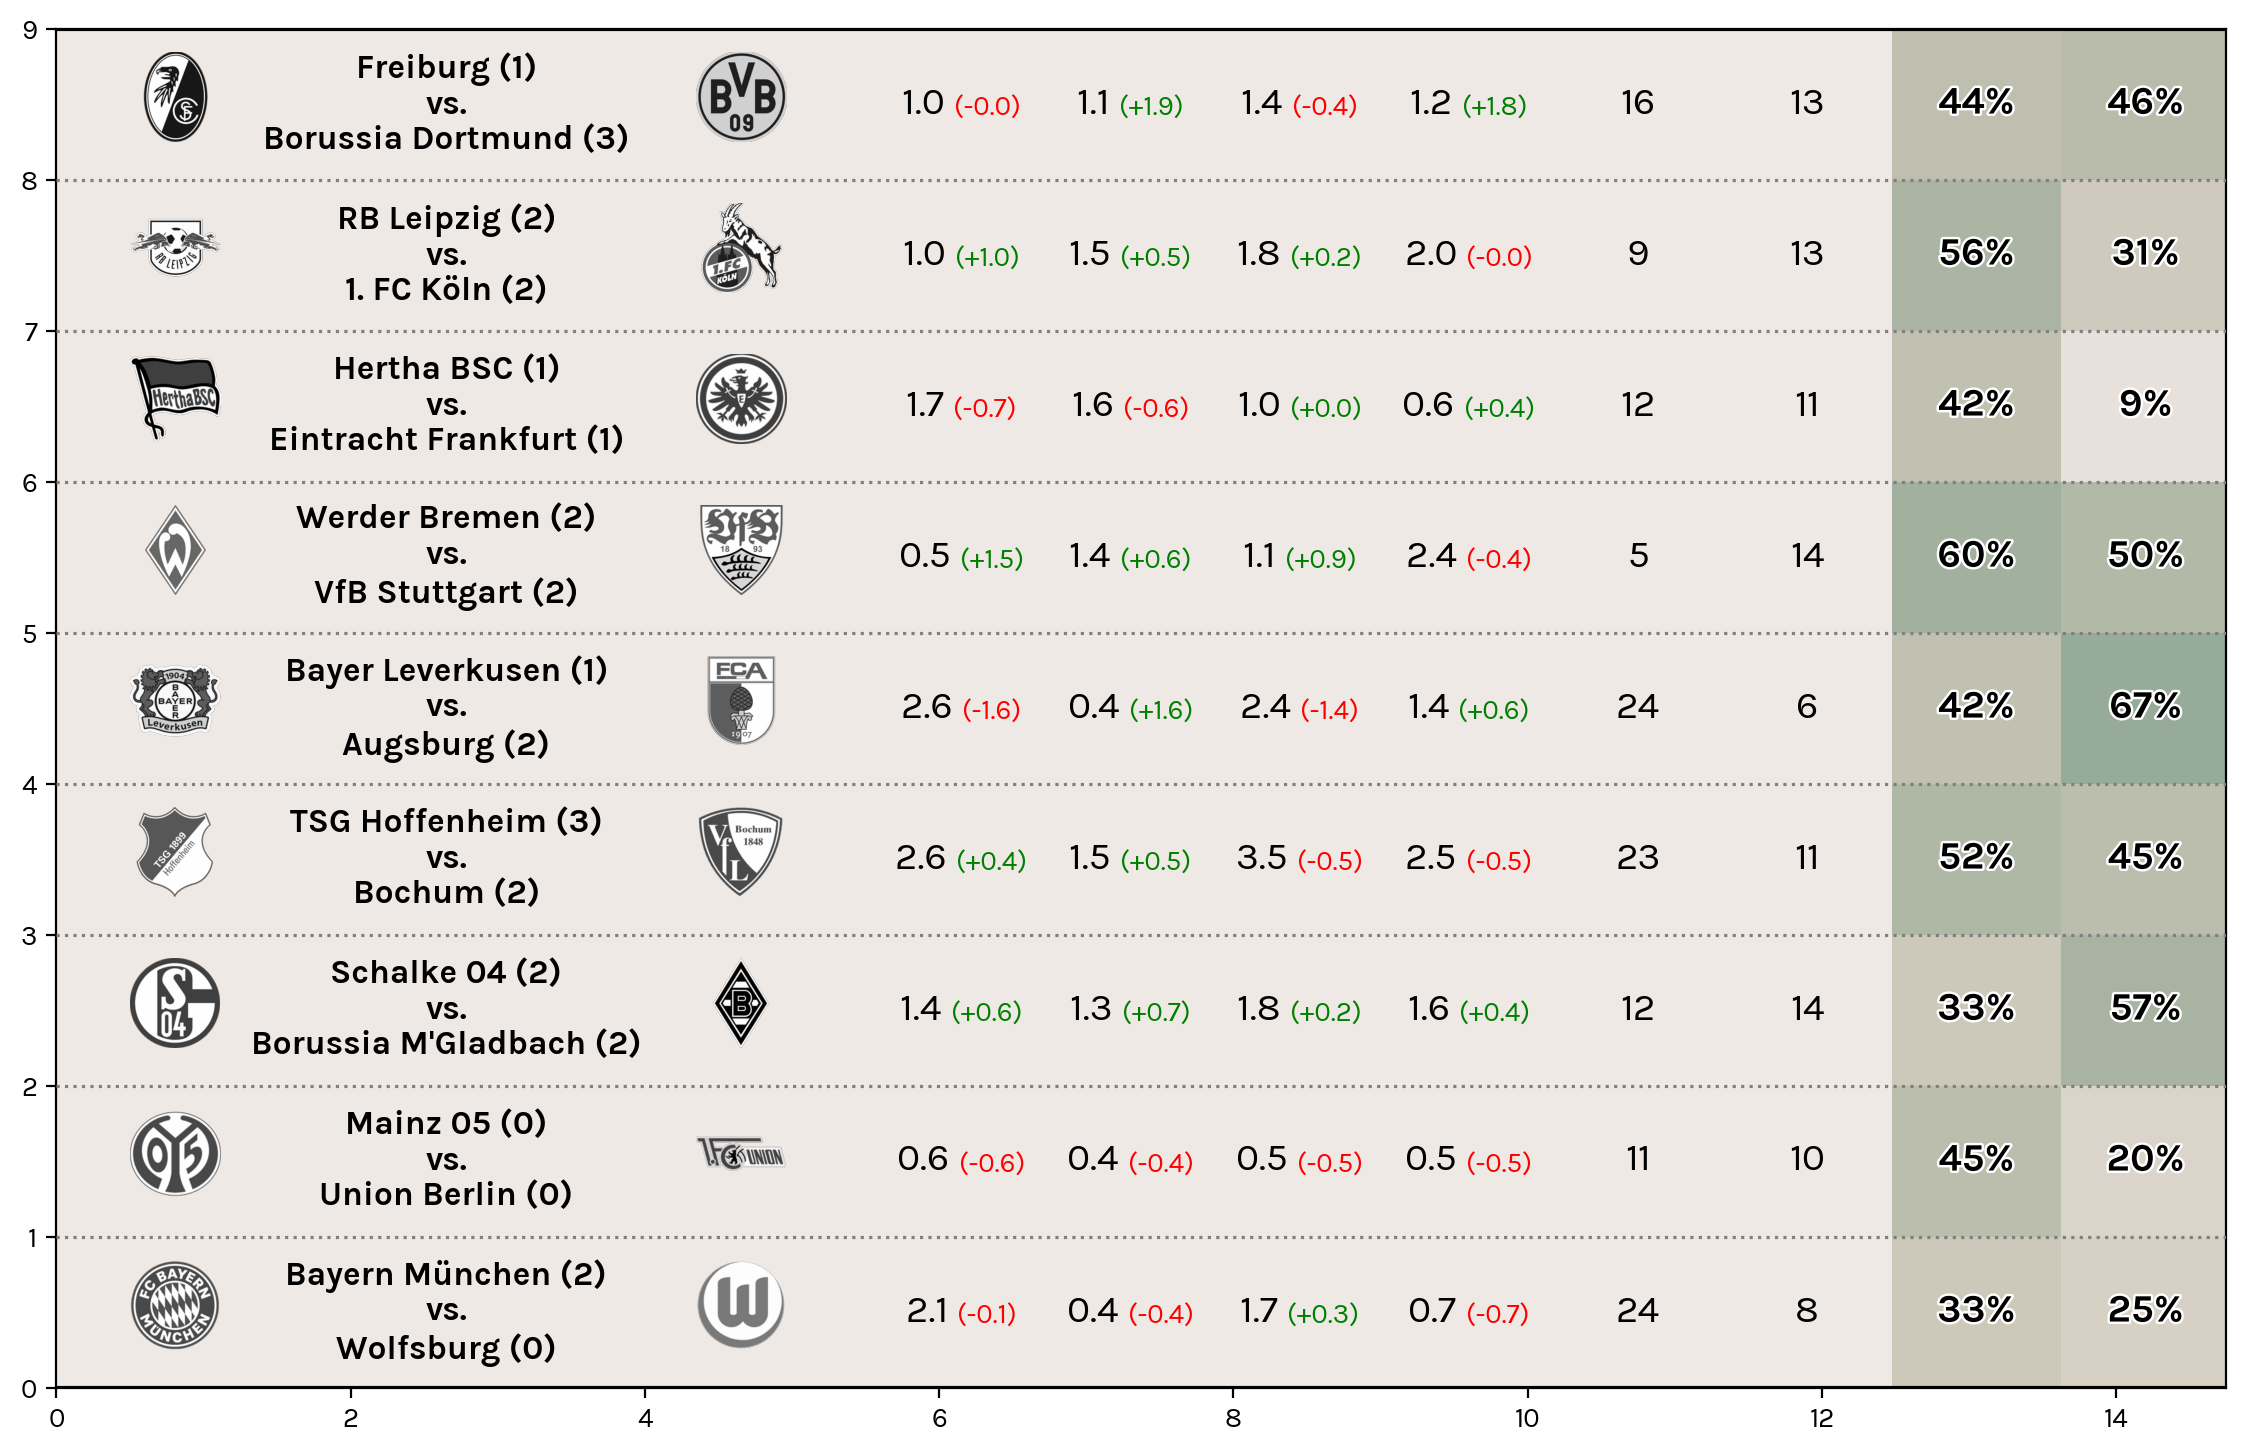

In [99]:

fig = plt.figure(figsize=(14, 9), dpi = 200)
ax = plt.subplot(111, facecolor = "#EFE9E6")

ncols = 14 
nrows = df.shape[0]

df = df.sort_values(by='date', ascending=False).reset_index(drop=True)

ax.set_xlim(0, ncols + .75)
ax.set_ylim(0, nrows)

# --- Define URL and helper functions to add logos --------------------------------

fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# Native data to normalized data coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

# -- The CMAP fot the gradient
cmap = cm.get_cmap('SOC')

for y in range(nrows):
    # -----------------------------------------
    # - Home logo
    x = 0
    team_id = df['home_team_id'].iloc[y]
    ax_coords = DC_to_NFC([x + .5, y + .25])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.05, 0.05], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    # -----------------------------------------
    # - Fixture result
    x = 2.65
    home_name = df['home_team_name'].iloc[y]
    away_name = df['away_team_name'].iloc[y]
    home_score = df['home_team_score'].iloc[y]
    away_score = df['away_team_score'].iloc[y]
    label_ = f'{home_name} ({home_score:.0f})\nvs.\n{away_name} ({away_score:.0f})'
    ax.annotate(
        xy=(x,y + 0.5),
        text=label_,
        ha='center',
        va='center',
        size=12,
        weight='bold'
    )
    # -----------------------------------------
    # - Away logo
    x = 5 
    team_id = df['away_team_id'].iloc[y]
    ax_coords = DC_to_NFC([x - .65, y + .25])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.05, 0.05], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    # -----------------------------------------
    # -- xGs
    home_xG = df['home_team_xG'].iloc[y]
    away_xG = df['away_team_xG'].iloc[y]
    xG_diff_h = home_score - home_xG
    xG_diff_a = away_score - away_xG
    # -- Home xG
    x = 6.15
    if xG_diff_h < 0:
        high_color='red'
        label_h_ = f'{home_xG:.1f} <({(xG_diff_h):.1f})>'
    else:
        high_color='green'
        label_h_ = f'{home_xG:.1f} <(+{(xG_diff_h):.1f})>'
    ax_text(
        x=x,y=y+0.5,
        s=label_h_,
        ha='center',
        va='center',
        highlight_textprops=[{'size':10,'color':high_color}],
        size=14,
        ax=ax
    )
    # -- Away xG
    x = 7.3
    if xG_diff_a < 0:
        high_color='red'
        label_a_ = f'{away_xG:.1f} <({(xG_diff_a):.1f})>'
    else:
        high_color='green'
        label_a_ = f'{away_xG:.1f} <(+{(xG_diff_a):.1f})>'
    ax_text(
        x=x,y=y+0.5,
        s=label_a_,
        ha='center',
        va='center',
        highlight_textprops=[{'size':10,'color':high_color}],
        size=14,
        ax=ax
    )
    # -----------------------------------------
    # -- xGOT
    home_xGOT = df['home_team_xGOT'].iloc[y]
    away_xGOT = df['away_team_xGOT'].iloc[y]
    xGOT_diff_h = home_score - home_xGOT
    xGOT_diff_a = away_score - away_xGOT
    # -- Home xGOT
    x = 8.45
    if xGOT_diff_h < 0:
        high_color='red'
        label_h_ = f'{home_xGOT:.1f} <({(xGOT_diff_h):.1f})>'
    else:
        high_color='green'
        label_h_ = f'{home_xGOT:.1f} <(+{(xGOT_diff_h):.1f})>'
    ax_text(
        x=x,y=y+0.5,
        s=label_h_,
        ha='center',
        va='center',
        highlight_textprops=[{'size':10,'color':high_color}],
        size=14,
        ax=ax
    )
    # -- Away xGOT
    x = 9.6
    if xGOT_diff_a < 0:
        high_color='red'
        label_a_ = f'{away_xGOT:.1f} <({(xGOT_diff_a):.1f})>'
    else:
        high_color='green'
        label_a_ = f'{away_xGOT:.1f} <(+{(xGOT_diff_a):.1f})>'
    ax_text(
        x=x,y=y+0.5,
        s=label_a_,
        ha='center',
        va='center',
        highlight_textprops=[{'size':10,'color':high_color}],
        size=14,
        ax=ax
    )
    # -----------------------------------------
    # -- Shots
    home_shots = df['home_team_shots'].iloc[y]
    away_shots = df['away_team_shots'].iloc[y]
    label_h_ = f'{home_shots:.0f}'
    label_a_ = f'{away_shots:.0f}'
    # -- Home shots
    x = 10.75
    ax_text(
        x=x,y=y+0.5,
        s=label_h_,
        ha='center',
        va='center',
        size=14,
        ax=ax
    )
    # -- Away shots
    x = 11.9
    ax_text(
        x=x,y=y+0.5,
        s=label_a_,
        ha='center',
        va='center',
        size=14,
        ax=ax
    )
    # -- Accuracy
    home_shotsOT = df['home_team_shotsOT'].iloc[y]
    away_shotsOT = df['away_team_shotsOT'].iloc[y]
    label_h_ = f'{home_shotsOT/home_shots:.0%}'
    label_a_ = f'{away_shotsOT/away_shots:.0%}'
    # -- Home shots
    x = 13.05
    text_ = ax.annotate(
        xy=(x,y+0.5),
        text=label_h_,
        ha='center',
        va='center',
        size=14,
        weight='bold'
    )
    text_.set_path_effects(
        [path_effects.Stroke(linewidth=1.75, foreground="white"), path_effects.Normal()]
    )
    # -- Away shots
    x = 14.2
    text_ = ax.annotate(
        xy=(x,y+0.5),
        text=label_a_,
        ha='center',
        va='center',
        size=14,
        weight='bold'
    )
    text_.set_path_effects(
        [path_effects.Stroke(linewidth=1.75, foreground="white"), path_effects.Normal()]
    )
    # -----------------------------------------
    # -- Adding the colors
    # -- We subtract and add .575 beacause the width of our colum in 1.15, 1/15/2 = .575
    x = 13.05
    ax.fill_between(
        x=[(x - .575), (x + .575)],
        y1=y,
        y2=y + 1,
        color=cmap(home_shotsOT/home_shots),
        zorder=2,
        ec="None",
        alpha=0.75
    )
    x = 14.2
    ax.fill_between(
        x=[(x - .575), (x + .575)],
        y1=y,
        y2=y + 1,
        color=cmap(away_shotsOT/away_shots),
        zorder=2,
        ec="None",
        alpha=0.75
    )


# Table borders
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw = 1.5, color = 'black', marker = '', zorder = 4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw = 1.5, color = 'black', marker = '', zorder = 4)
for x in range(nrows):
    if x == 0:
        continue
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw = 1.15, color = 'gray', ls = ':', zorder = 3 , marker = '')



### Final touches

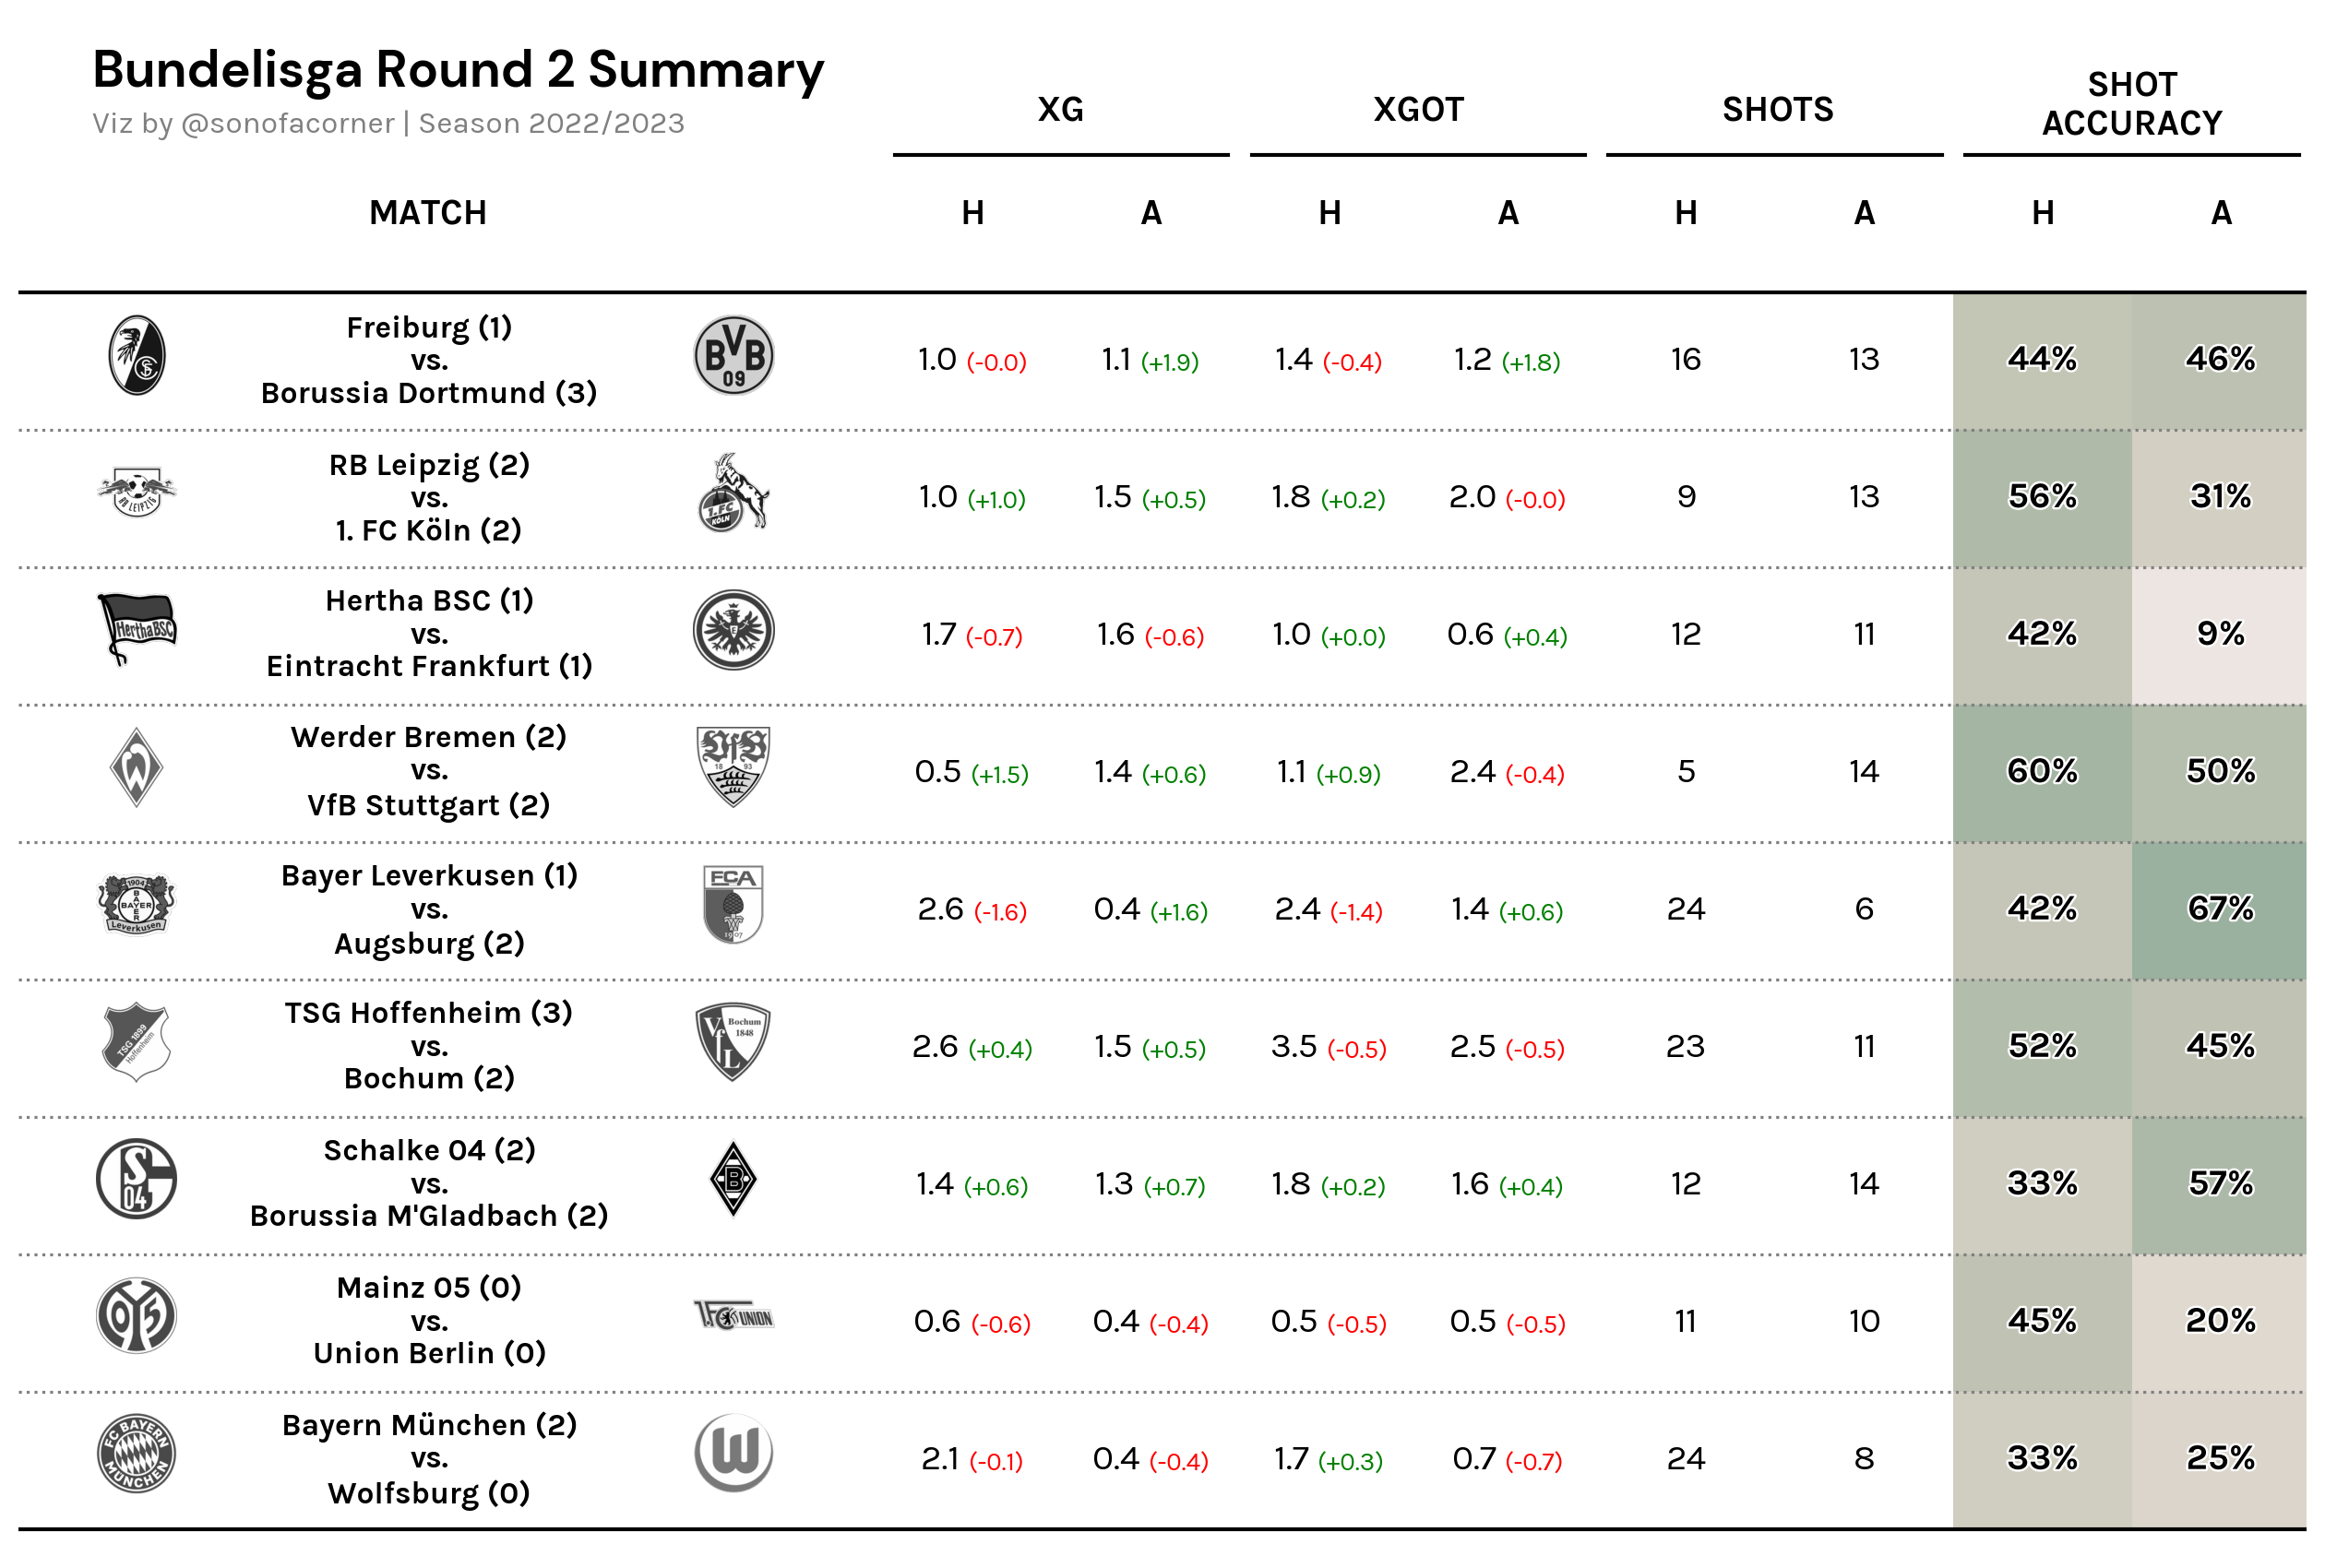

In [111]:

fig = plt.figure(figsize=(16, 11), dpi = 200)
ax = plt.subplot(111, facecolor = "#EFE9E6")

ncols = 14 
nrows = df.shape[0]

df = df.sort_values(by='date', ascending=False).reset_index(drop=True)

ax.set_xlim(0, ncols + .75)
ax.set_ylim(-.15, nrows + 2)

# --- Define URL and helper functions to add logos --------------------------------

fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# Native data to normalized data coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

# -- The CMAP fot the gradient
cmap = cm.get_cmap('SOC')

for y in range(nrows):
    # -----------------------------------------
    # - Home logo
    x = 0
    team_id = df['home_team_id'].iloc[y]
    ax_coords = DC_to_NFC([x + .5, y + .25])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.04, 0.04], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    # -----------------------------------------
    # - Fixture result
    x = 2.65
    home_name = df['home_team_name'].iloc[y]
    away_name = df['away_team_name'].iloc[y]
    home_score = df['home_team_score'].iloc[y]
    away_score = df['away_team_score'].iloc[y]
    label_ = f'{home_name} ({home_score:.0f})\nvs.\n{away_name} ({away_score:.0f})'
    ax.annotate(
        xy=(x,y + 0.5),
        text=label_,
        ha='center',
        va='center',
        size=12,
        weight='bold'
    )
    # -----------------------------------------
    # - Away logo
    x = 5 
    team_id = df['away_team_id'].iloc[y]
    ax_coords = DC_to_NFC([x - .65, y + .25])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.04, 0.04], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    # -----------------------------------------
    # -- xGs
    home_xG = df['home_team_xG'].iloc[y]
    away_xG = df['away_team_xG'].iloc[y]
    xG_diff_h = home_score - home_xG
    xG_diff_a = away_score - away_xG
    # -- Home xG
    x = 6.15
    if xG_diff_h < 0:
        high_color='red'
        label_h_ = f'{home_xG:.1f} <({(xG_diff_h):.1f})>'
    else:
        high_color='green'
        label_h_ = f'{home_xG:.1f} <(+{(xG_diff_h):.1f})>'
    ax_text(
        x=x,y=y+0.5,
        s=label_h_,
        ha='center',
        va='center',
        highlight_textprops=[{'size':10,'color':high_color}],
        size=14,
        ax=ax
    )
    # -- Away xG
    x = 7.3
    if xG_diff_a < 0:
        high_color='red'
        label_a_ = f'{away_xG:.1f} <({(xG_diff_a):.1f})>'
    else:
        high_color='green'
        label_a_ = f'{away_xG:.1f} <(+{(xG_diff_a):.1f})>'
    ax_text(
        x=x,y=y+0.5,
        s=label_a_,
        ha='center',
        va='center',
        highlight_textprops=[{'size':10,'color':high_color}],
        size=14,
        ax=ax
    )
    # -----------------------------------------
    # -- xGOT
    home_xGOT = df['home_team_xGOT'].iloc[y]
    away_xGOT = df['away_team_xGOT'].iloc[y]
    xGOT_diff_h = home_score - home_xGOT
    xGOT_diff_a = away_score - away_xGOT
    # -- Home xGOT
    x = 8.45
    if xGOT_diff_h < 0:
        high_color='red'
        label_h_ = f'{home_xGOT:.1f} <({(xGOT_diff_h):.1f})>'
    else:
        high_color='green'
        label_h_ = f'{home_xGOT:.1f} <(+{(xGOT_diff_h):.1f})>'
    ax_text(
        x=x,y=y+0.5,
        s=label_h_,
        ha='center',
        va='center',
        highlight_textprops=[{'size':10,'color':high_color}],
        size=14,
        ax=ax
    )
    # -- Away xGOT
    x = 9.6
    if xGOT_diff_a < 0:
        high_color='red'
        label_a_ = f'{away_xGOT:.1f} <({(xGOT_diff_a):.1f})>'
    else:
        high_color='green'
        label_a_ = f'{away_xGOT:.1f} <(+{(xGOT_diff_a):.1f})>'
    ax_text(
        x=x,y=y+0.5,
        s=label_a_,
        ha='center',
        va='center',
        highlight_textprops=[{'size':10,'color':high_color}],
        size=14,
        ax=ax
    )
    # -----------------------------------------
    # -- Shots
    home_shots = df['home_team_shots'].iloc[y]
    away_shots = df['away_team_shots'].iloc[y]
    label_h_ = f'{home_shots:.0f}'
    label_a_ = f'{away_shots:.0f}'
    # -- Home shots
    x = 10.75
    ax_text(
        x=x,y=y+0.5,
        s=label_h_,
        ha='center',
        va='center',
        size=14,
        ax=ax
    )
    # -- Away shots
    x = 11.9
    ax_text(
        x=x,y=y+0.5,
        s=label_a_,
        ha='center',
        va='center',
        size=14,
        ax=ax
    )
    # -- Accuracy
    home_shotsOT = df['home_team_shotsOT'].iloc[y]
    away_shotsOT = df['away_team_shotsOT'].iloc[y]
    label_h_ = f'{home_shotsOT/home_shots:.0%}'
    label_a_ = f'{away_shotsOT/away_shots:.0%}'
    # -- Home shots
    x = 13.05
    text_ = ax.annotate(
        xy=(x,y+0.5),
        text=label_h_,
        ha='center',
        va='center',
        size=14,
        weight='bold'
    )
    text_.set_path_effects(
        [path_effects.Stroke(linewidth=1.75, foreground="white"), path_effects.Normal()]
    )
    # -- Away shots
    x = 14.2
    text_ = ax.annotate(
        xy=(x,y+0.5),
        text=label_a_,
        ha='center',
        va='center',
        size=14,
        weight='bold'
    )
    text_.set_path_effects(
        [path_effects.Stroke(linewidth=1.75, foreground="white"), path_effects.Normal()]
    )
    # -----------------------------------------
    # -- Adding the colors
    # -- We subtract and add .575 beacause the width of our colum in 1.15, 1/15/2 = .575
    x = 13.05
    ax.fill_between(
        x=[(x - .575), (x + .575)],
        y1=y,
        y2=y + 1,
        color=cmap(home_shotsOT/home_shots),
        zorder=2,
        ec="None",
        alpha=0.75
    )
    x = 14.2
    ax.fill_between(
        x=[(x - .575), (x + .575)],
        y1=y,
        y2=y + 1,
        color=cmap(away_shotsOT/away_shots),
        zorder=2,
        ec="None",
        alpha=0.75
    )


# ----------------------------------------------------------------
# Table borders
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw = 1.5, color = 'black', marker = '', zorder = 4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw = 1.5, color = 'black', marker = '', zorder = 4)
for x in range(nrows):
    if x == 0:
        continue
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw = 1.15, color = 'gray', ls = ':', zorder = 3 , marker = '')

# ----------------------------------------------------------------
# - Column titles
ax.annotate(
    xy = (2.25, nrows + .5),
    text = "MATCH",
    weight = "bold",
    ha = "left",
    size = 14
)
title_positions = [6.15 + 1.15*i for i in range(0,8)]
title_labels = ['H' if i % 2 == 0 else 'A' for i in range(0,8)]
for index in range(0,8):
    ax.annotate(
        xy = (title_positions[index], nrows + .5),
        text = title_labels[index],
        weight = "bold",
        ha = "center",
        size = 14
    )
    # --- Lines to make the plot pretty
    if index % 2 != 0:
        continue
    ax.plot(
        [title_positions[index] - .5, title_positions[index + 1] + .5],
        [nrows + 1, nrows + 1],
        lw = 1.5,
        color = 'black'
    )

ax.annotate(
    xy = ((6.15 + 7.3)/2, nrows + 1.25),
    text = 'XG',
    weight = "bold",
    ha = "center",
    size = 14
)
ax.annotate(
    xy = ((8.45 + 9.6)/2, nrows + 1.25),
    text = 'XGOT',
    weight = "bold",
    ha = "center",
    size = 14
)
ax.annotate(
    xy = ((10.785 + 11.9)/2, nrows + 1.25),
    text = 'SHOTS',
    weight = "bold",
    ha = "center",
    size = 14
)
ax.annotate(
    xy = ((13.05 + 14.2)/2, nrows + 1.15),
    text = 'SHOT\nACCURACY',
    weight = "bold",
    ha = "center",
    size = 14
)

ax.set_axis_off()

fig_text(
    x = 0.15, y = 0.84, 
    s = "Bundelisga Round 2 Summary",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black", font = "DM Sans", weight = "bold"
)

fig_text(
    x = 0.15, y = 0.82, 
    s = "Viz by @sonofacorner | Season 2022/2023",
    va = "bottom", ha = "left",
    fontsize = 12, color = "gray", font = "Karla"
)

plt.savefig(
	"figures/08152022_bundesliga_round2.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"figures/08152022_bundesliga_round2_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)
